In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Sample data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [23, 20, 22, 30, 35, 32, 40, 42, 41]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Perform ANOVA
anova_result = stats.f_oneway(df[df['Group'] == 'A']['Value'],
                              df[df['Group'] == 'B']['Value'],
                              df[df['Group'] == 'C']['Value'])

# Print the results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

# Interpretation of the result
if anova_result.pvalue < 0.05:
    print("The differences between the group means are statistically significant.")
else:
    print("The differences between the group means are not statistically significant.")

ANOVA F-statistic: 87.31034482758604
ANOVA p-value: 3.66565225237785e-05
The differences between the group means are statistically significant.


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Sample data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [23, 20, 22, 30, 35, 32, 40, 42, 41]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group data by 'Group' column and extract values for each group
grouped_data = [df[df['Group'] == group]['Value'] for group in df['Group'].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*grouped_data)

# Print the results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

# Interpretation of the result
if anova_result.pvalue < 0.05:
    print("The differences between the group means are statistically significant.")
else:
    print("The differences between the group means are not statistically significant.")

In [3]:
import pandas as pd

# Sample data
data = {'Values': [23, 20, 22, 30, 35, 32, 40, 42, 41]}
df = pd.DataFrame(data)

# Descriptive statistics
mean = df['Values'].mean()
median = df['Values'].median()
mode = df['Values'].mode()[0]
std_dev = df['Values'].std()
variance = df['Values'].var()
range_val = df['Values'].max() - df['Values'].min()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_val}")

Mean: 31.666666666666668
Median: 32.0
Mode: 20
Standard Deviation: 8.52936105461599
Variance: 72.75
Range: 22


In [4]:
import scipy.stats as stats

# Sample data
group1 = [23, 20, 22, 30, 35]
group2 = [32, 40, 42, 41, 38]

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference between the group means is statistically significant.")
else:
    print("The difference between the group means is not statistically significant.")

T-statistic: -3.7887241097428612
P-value: 0.005321501196965141
The difference between the group means is statistically significant.


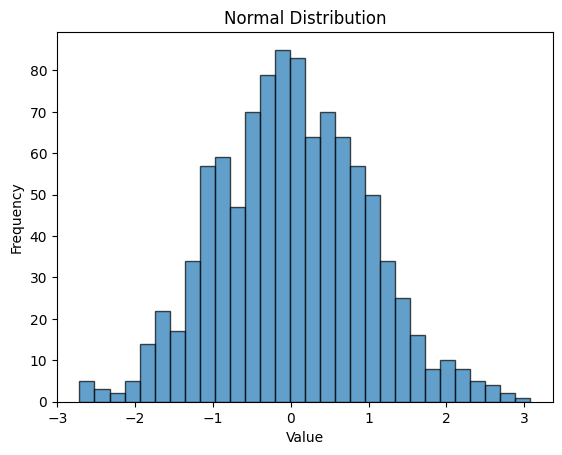

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot the distribution
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
import pandas as pd
import statsmodels.api as sm

# Sample data with more observations
data = {'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'Y': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]}
df = pd.DataFrame(data)

# Perform linear regression
X = sm.add_constant(df['X'])  # Adds a constant term to the predictor
model = sm.OLS(df['Y'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1410.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.50e-18
Time:                        20:02:27   Log-Likelihood:                -46.370
No. Observations:                  20   AIC:                             96.74
Df Residuals:                      18   BIC:                             98.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6737      1.204     -6.374      0.0

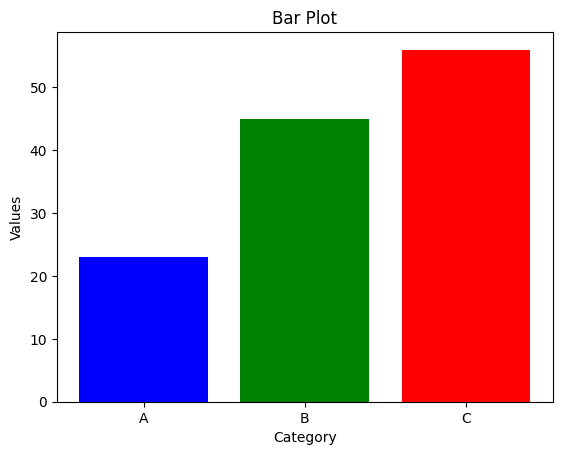

In [10]:
import matplotlib.pyplot as plt

# Sample data
data = {'Category': ['A', 'B', 'C'], 'Values': [23, 45, 56]}
df = pd.DataFrame(data)

# Bar plot
plt.bar(df['Category'], df['Values'], color=['blue', 'green', 'red'])
plt.title('Bar Plot')
plt.xlabel('Category')
plt.ylabel('Values')
plt.show()

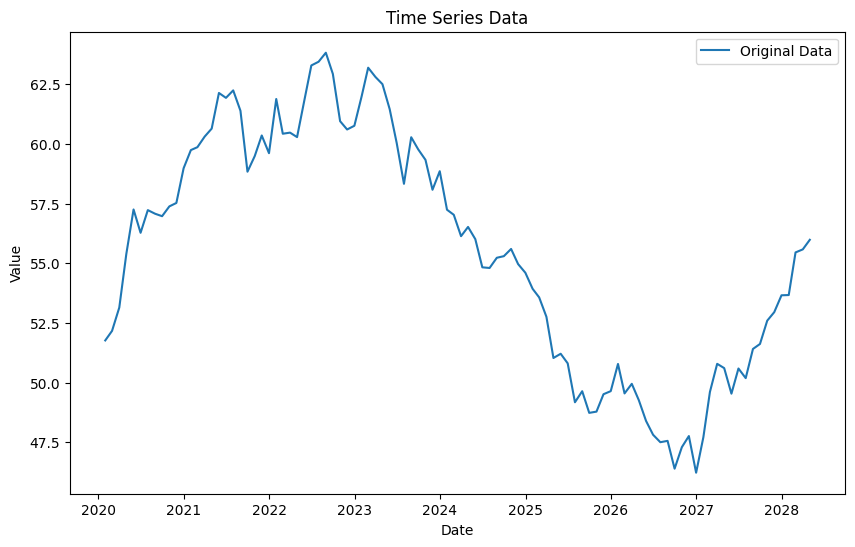

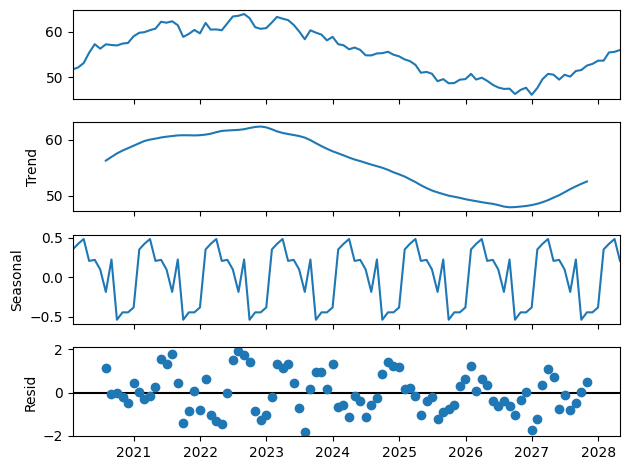

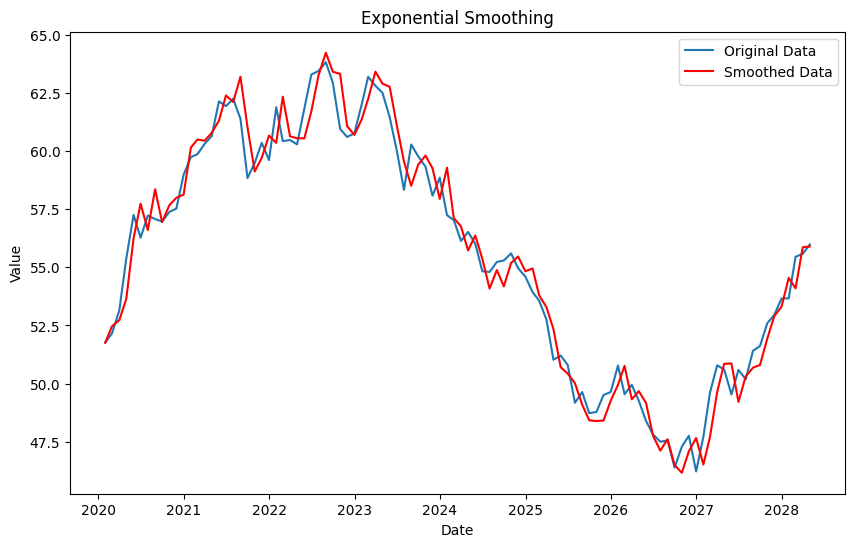

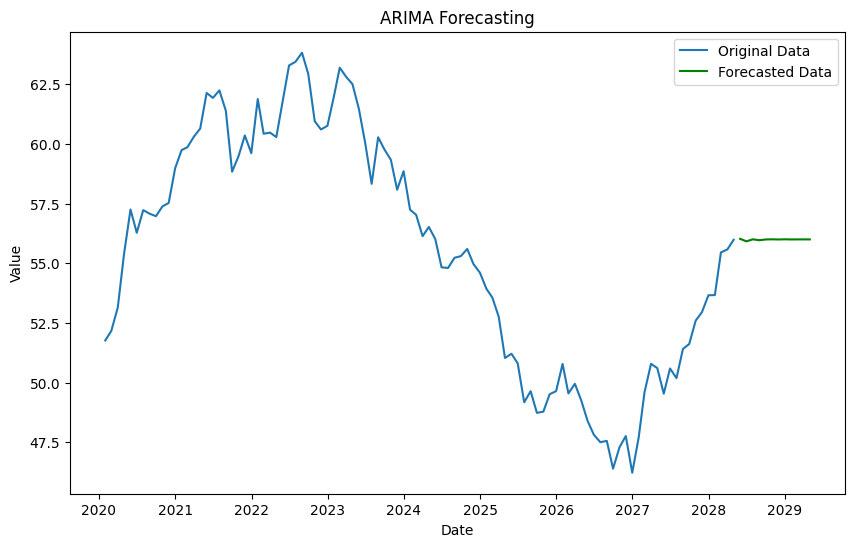

Time Series Analysis completed successfully.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Generate sample time series data
np.random.seed(0)
date_range = pd.date_range(start='1/1/2020', periods=100, freq='ME')
data = np.random.randn(100).cumsum() + 50  # Random walk data

# Create a DataFrame
df = pd.DataFrame(data, index=date_range, columns=['Value'])

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Decompose the time series data
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

# Smoothing using Exponential Smoothing
model = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=12).fit()
df['Smoothed'] = model.fittedvalues

# Plot the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original Data')
plt.plot(df['Smoothed'], label='Smoothed Data', color='red')
plt.title('Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Forecasting using ARIMA
arima_model = ARIMA(df['Value'], order=(5, 1, 0)).fit()
forecast = arima_model.forecast(steps=12)

# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original Data')
plt.plot(forecast, label='Forecasted Data', color='green')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("Time Series Analysis completed successfully.")

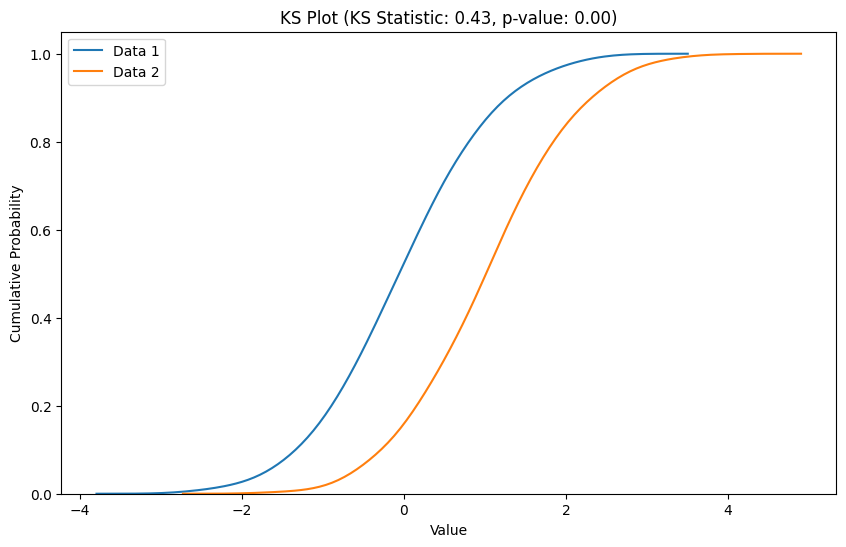

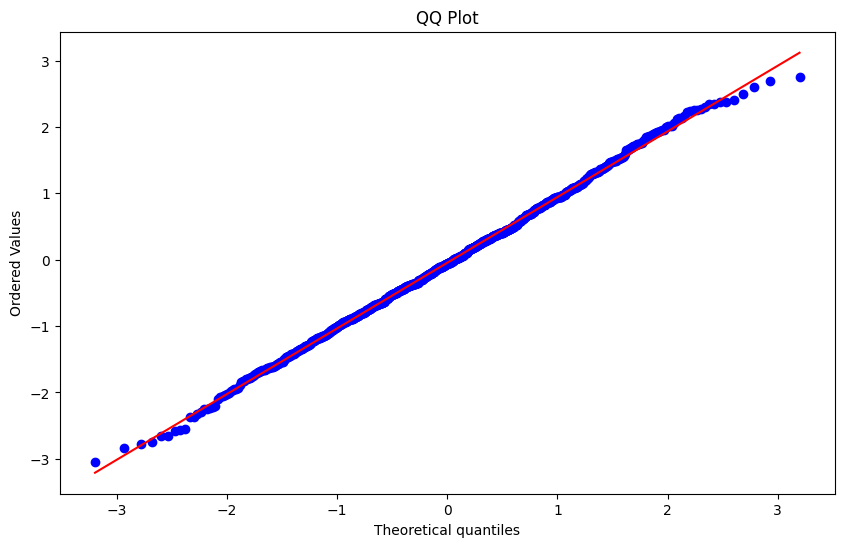

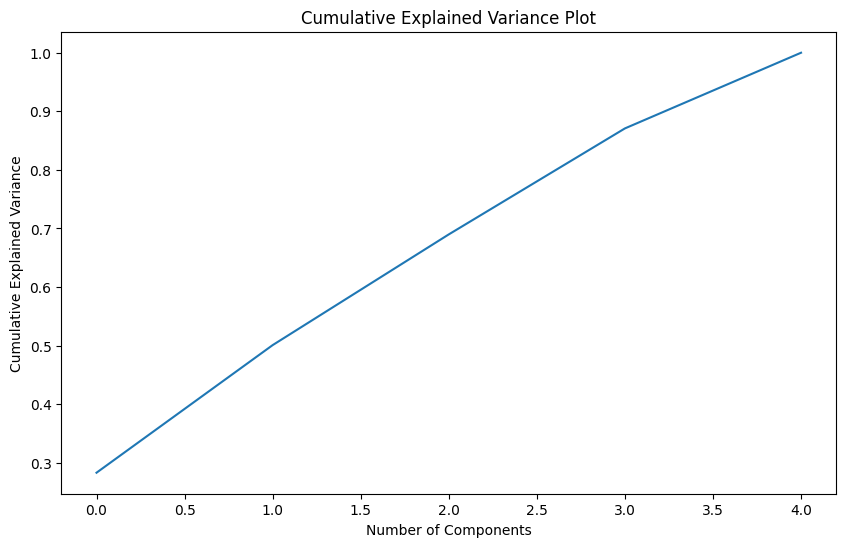

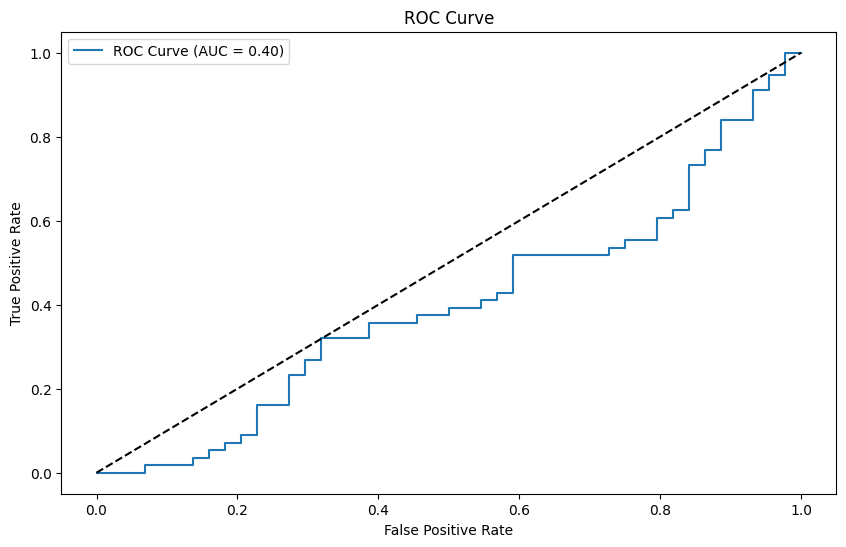

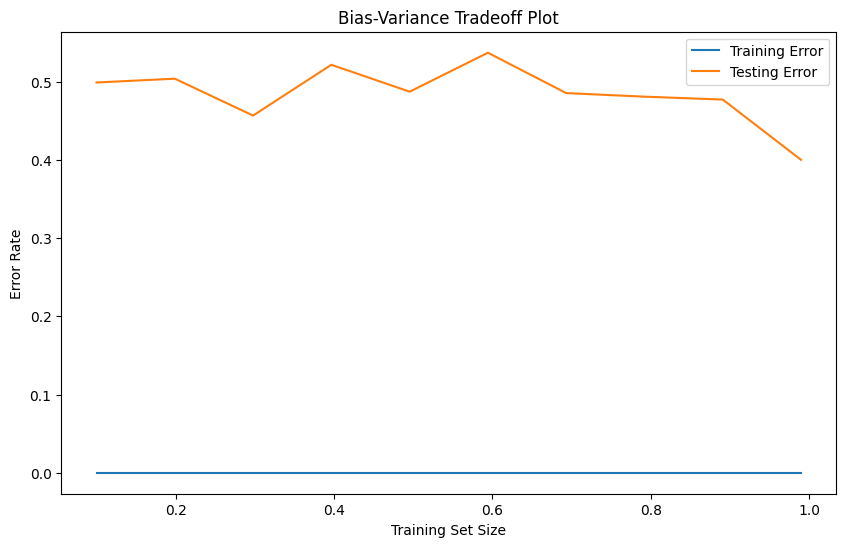

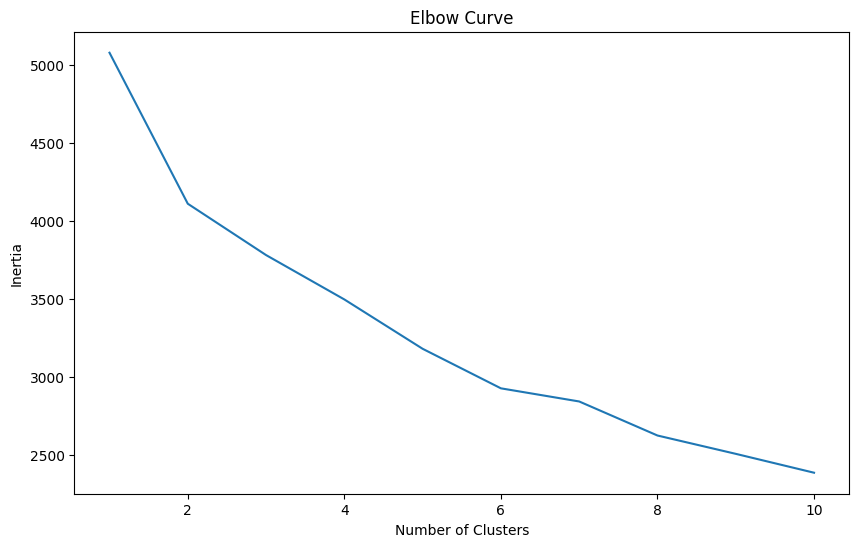

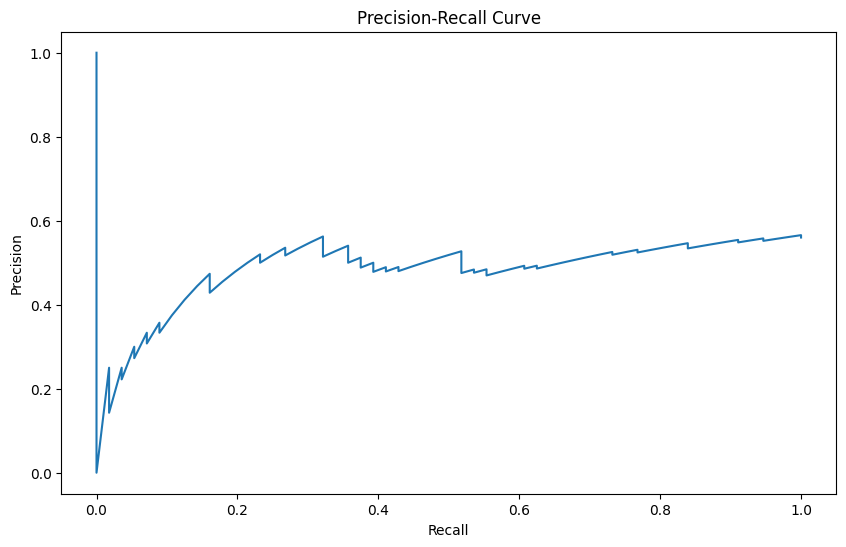

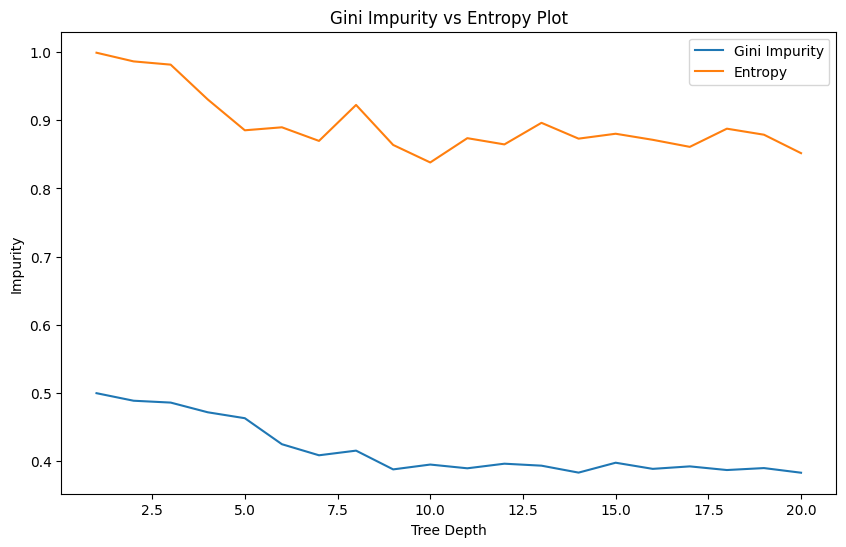

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ks_2samp, probplot

# Generate sample data
np.random.seed(0)
data = np.random.randn(1000)
data2 = np.random.randn(1000) + 1

# KS Plot
ks_stat, p_value = ks_2samp(data, data2)
plt.figure(figsize=(10, 6))
sns.kdeplot(data, cumulative=True, label='Data 1')
sns.kdeplot(data2, cumulative=True, label='Data 2')
plt.title(f'KS Plot (KS Statistic: {ks_stat:.2f}, p-value: {p_value:.2f})')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

# QQ Plot
plt.figure(figsize=(10, 6))
probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

# Cumulative Explained Variance Plot
pca = PCA().fit(np.random.randn(100, 5))
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(explained_variance)
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# ROC Curve
y_true = np.random.randint(0, 2, 100)
y_scores = np.random.rand(100)
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# BIAS Variance Tradeoff Plot (using Decision Tree Classifier)
train_sizes = np.linspace(0.1, 0.99, 10)  # Ensure train_size is slightly less than 1.0
train_errors = []
test_errors = []

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        np.random.randn(1000, 5), 
        np.random.randint(0, 2, 1000), 
        train_size=train_size  # Use the train_size directly (no need to convert)
    )
    model = DecisionTreeClassifier().fit(X_train, y_train)
    train_errors.append(1 - model.score(X_train, y_train))
    test_errors.append(1 - model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error')
plt.plot(train_sizes, test_errors, label='Testing Error')
plt.title('Bias-Variance Tradeoff Plot')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

# Elbow Curve (using KMeans Clustering)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(np.random.randn(1000, 5))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Gini Impurity vs Entropy Plot (using Decision Tree Classifier)
depths = range(1, 21)
gini_impurity = []
entropy = []
for depth in depths:
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth).fit(np.random.randn(1000, 5), np.random.randint(0, 2, 1000))
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth).fit(np.random.randn(1000, 5), np.random.randint(0, 2, 1000))
    gini_impurity.append(clf_gini.tree_.impurity[clf_gini.tree_.children_left != -1].mean())
    entropy.append(clf_entropy.tree_.impurity[clf_entropy.tree_.children_left != -1].mean())

plt.figure(figsize=(10, 6))
plt.plot(depths, gini_impurity, label='Gini Impurity')
plt.plot(depths, entropy, label='Entropy')
plt.title('Gini Impurity vs Entropy Plot')
plt.xlabel('Tree Depth')
plt.ylabel('Impurity')
plt.legend()
plt.show()


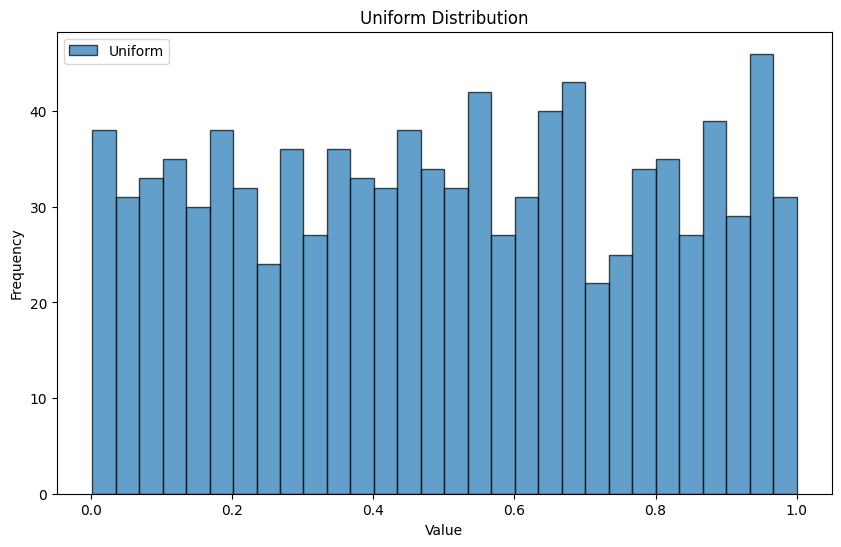

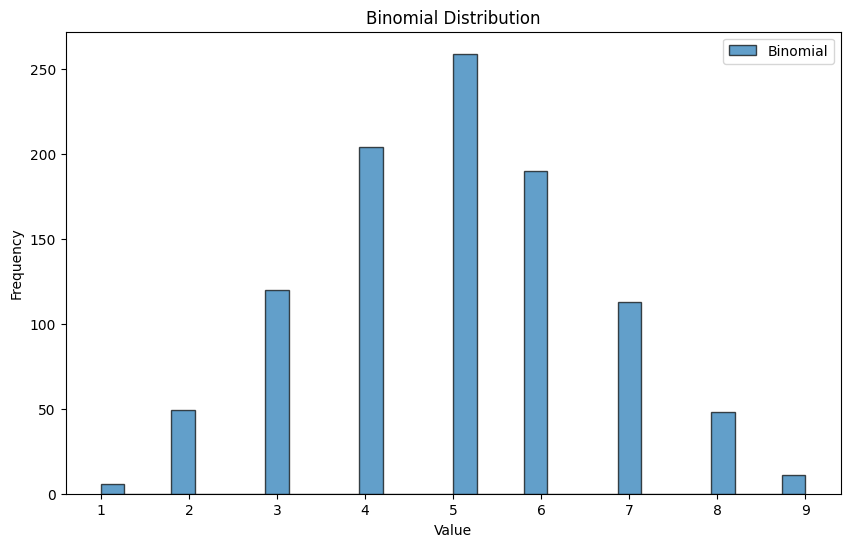

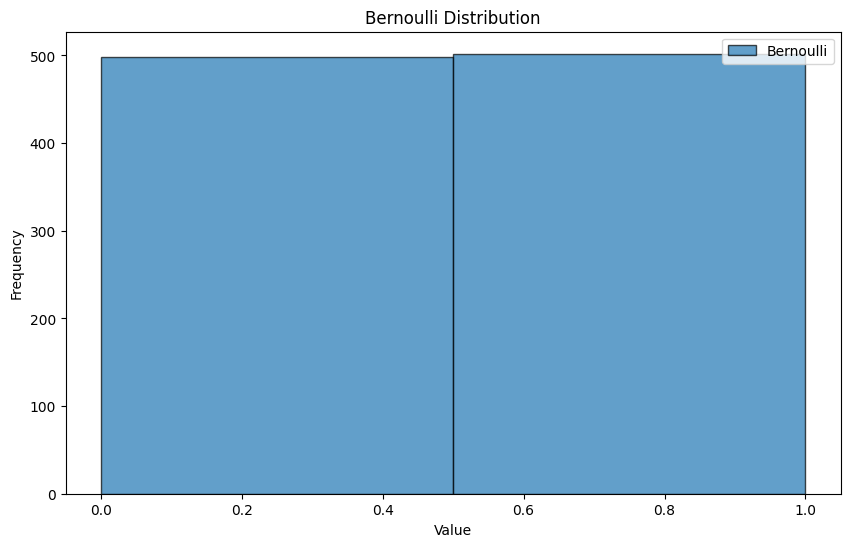

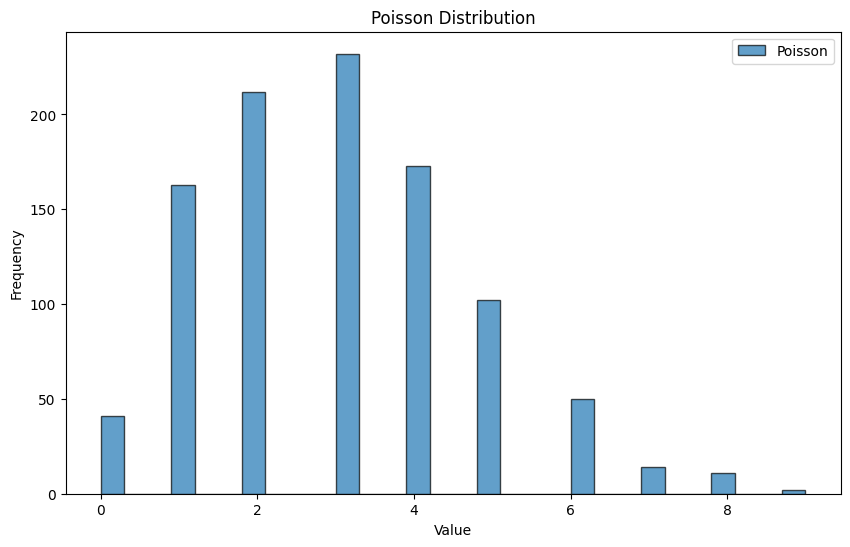

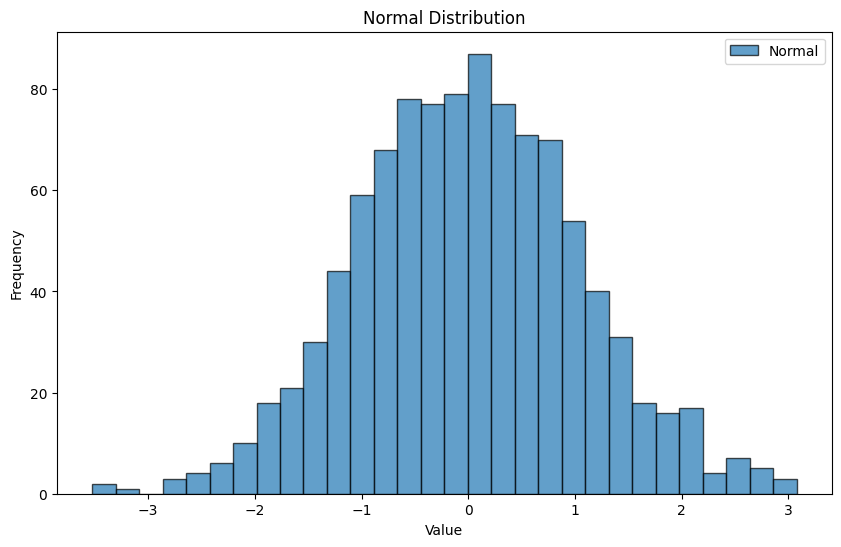

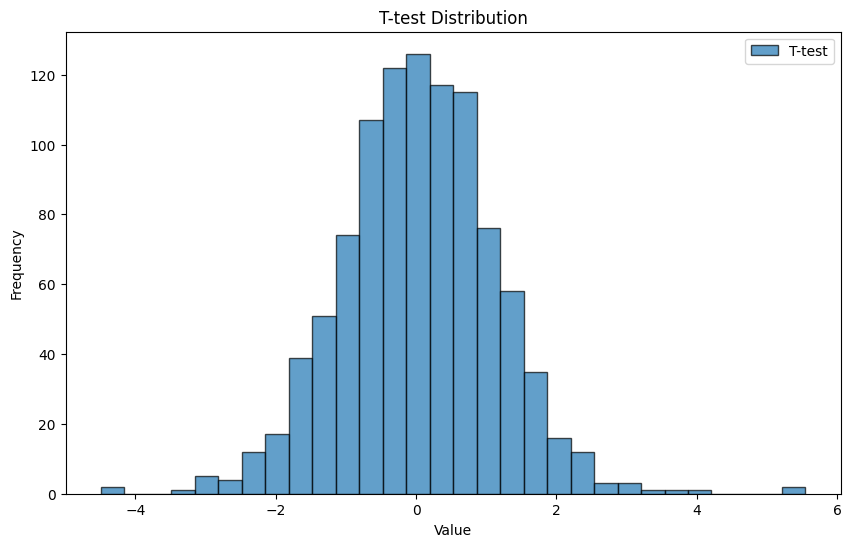

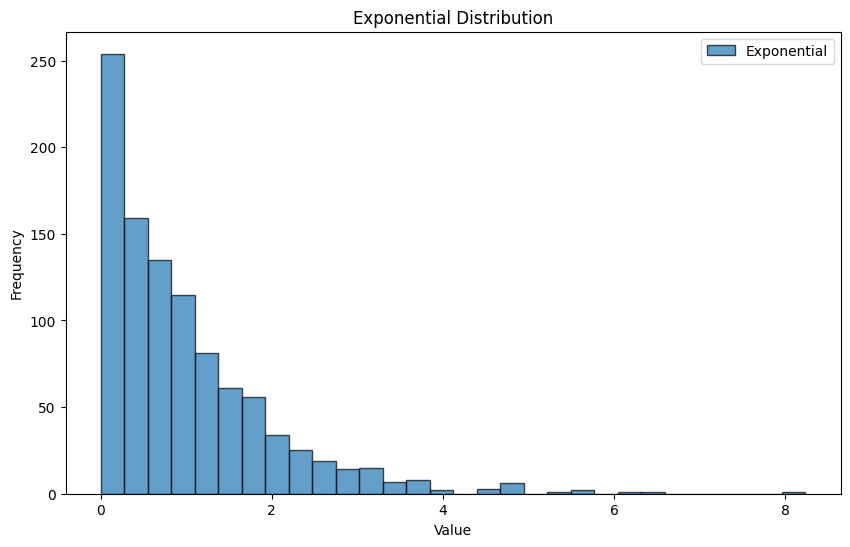

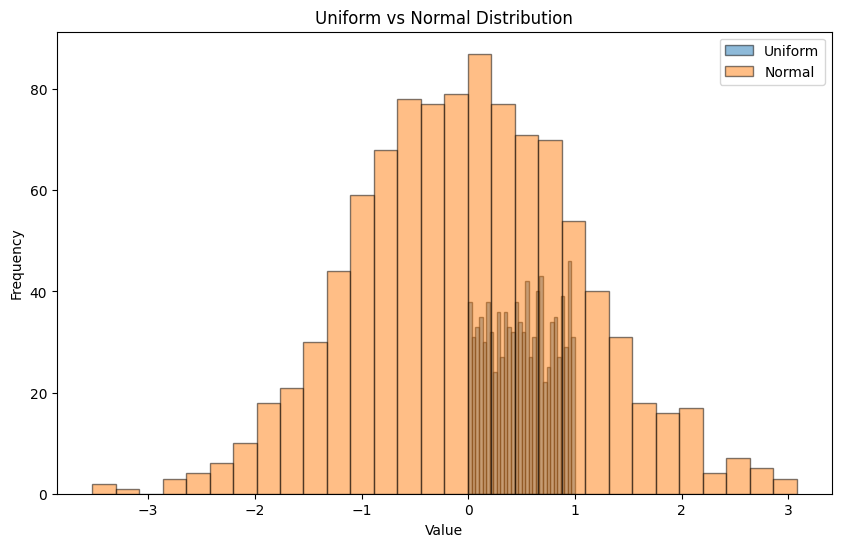

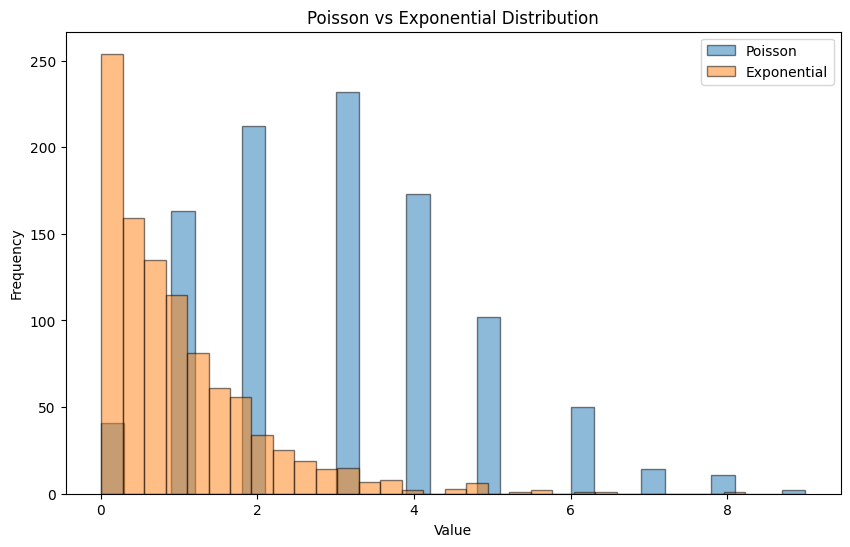

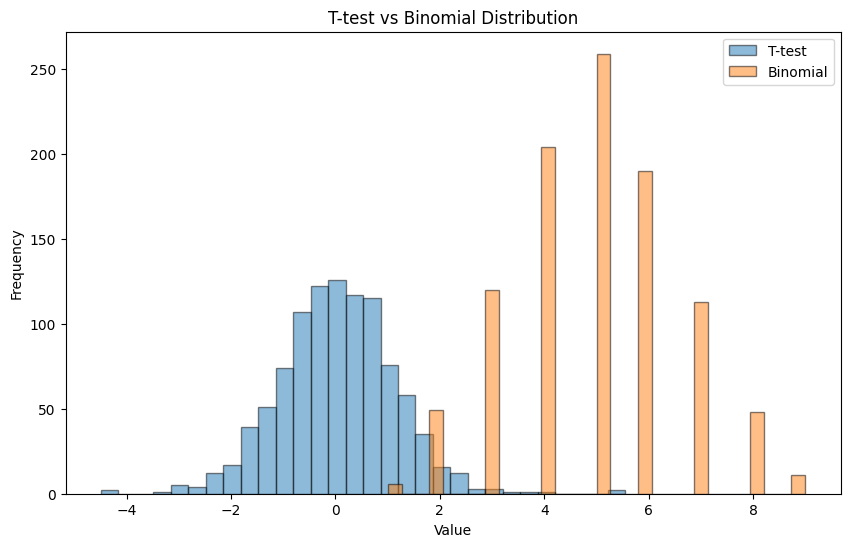

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Uniform Distribution
uniform_data = np.random.uniform(low=0, high=1, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(uniform_data, bins=30, edgecolor='k', alpha=0.7, label='Uniform')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Binomial Distribution
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(binomial_data, bins=30, edgecolor='k', alpha=0.7, label='Binomial')
plt.title('Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Bernoulli Distribution
bernoulli_data = np.random.binomial(n=1, p=0.5, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(bernoulli_data, bins=2, edgecolor='k', alpha=0.7, label='Bernoulli')
plt.title('Bernoulli Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Poisson Distribution
poisson_data = np.random.poisson(lam=3, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(poisson_data, bins=30, edgecolor='k', alpha=0.7, label='Poisson')
plt.title('Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Normal Distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(normal_data, bins=30, edgecolor='k', alpha=0.7, label='Normal')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# T-test Distribution
t_data = np.random.standard_t(df=10, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(t_data, bins=30, edgecolor='k', alpha=0.7, label='T-test')
plt.title('T-test Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Exponential Distribution
exponential_data = np.random.exponential(scale=1, size=1000)
plt.figure(figsize=(10, 6))
plt.hist(exponential_data, bins=30, edgecolor='k', alpha=0.7, label='Exponential')
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Overlay Uniform vs Normal Distribution
plt.figure(figsize=(10, 6))
plt.hist(uniform_data, bins=30, edgecolor='k', alpha=0.5, label='Uniform')
plt.hist(normal_data, bins=30, edgecolor='k', alpha=0.5, label='Normal')
plt.title('Uniform vs Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Overlay Poisson vs Exponential Distribution
plt.figure(figsize=(10, 6))
plt.hist(poisson_data, bins=30, edgecolor='k', alpha=0.5, label='Poisson')
plt.hist(exponential_data, bins=30, edgecolor='k', alpha=0.5, label='Exponential')
plt.title('Poisson vs Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Overlay T-test vs Binomial Distribution
plt.figure(figsize=(10, 6))
plt.hist(t_data, bins=30, edgecolor='k', alpha=0.5, label='T-test')
plt.hist(binomial_data, bins=30, edgecolor='k', alpha=0.5, label='Binomial')
plt.title('T-test vs Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


6. Hypothesis Testing (T-test Example)
Let's use a T-test to test the hypothesis that the means of two independent samples are equal. We'll generate two synthetic datasets and perform a t-test to evaluate if there's a significant difference between them.

Reject null hypothesis: p-value = 0.0000. There is a significant difference.


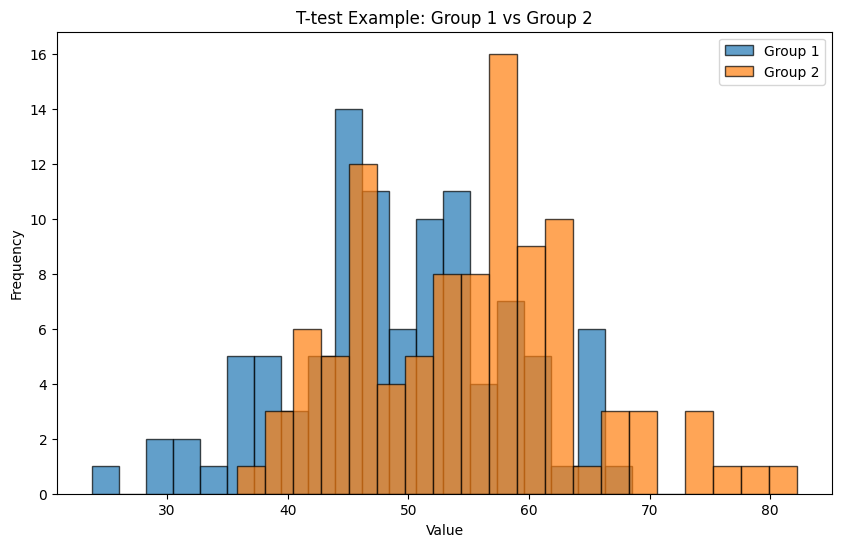

In [21]:
from scipy import stats
import numpy as np

# Generate two random samples (e.g., two different groups)
np.random.seed(42)
group_1 = np.random.normal(loc=50, scale=10, size=100)  # Sample 1: mean=50, std=10
group_2 = np.random.normal(loc=55, scale=10, size=100)  # Sample 2: mean=55, std=10

# Perform the T-test (two-sample)
t_stat, p_value = stats.ttest_ind(group_1, group_2)

# Results interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print(f"Reject null hypothesis: p-value = {p_value:.4f}. There is a significant difference.")
else:
    print(f"Fail to reject null hypothesis: p-value = {p_value:.4f}. No significant difference.")

# Plot the distributions of the two groups
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(group_1, bins=20, alpha=0.7, label='Group 1', edgecolor='k')
plt.hist(group_2, bins=20, alpha=0.7, label='Group 2', edgecolor='k')
plt.title('T-test Example: Group 1 vs Group 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


5. Regression Analysis (Linear Regression Example)
Here, we use Linear Regression from the sklearn library. Let's generate a synthetic dataset and build a simple linear regression model.

Linear Regression Equation: y = 5.22 + 2.54x


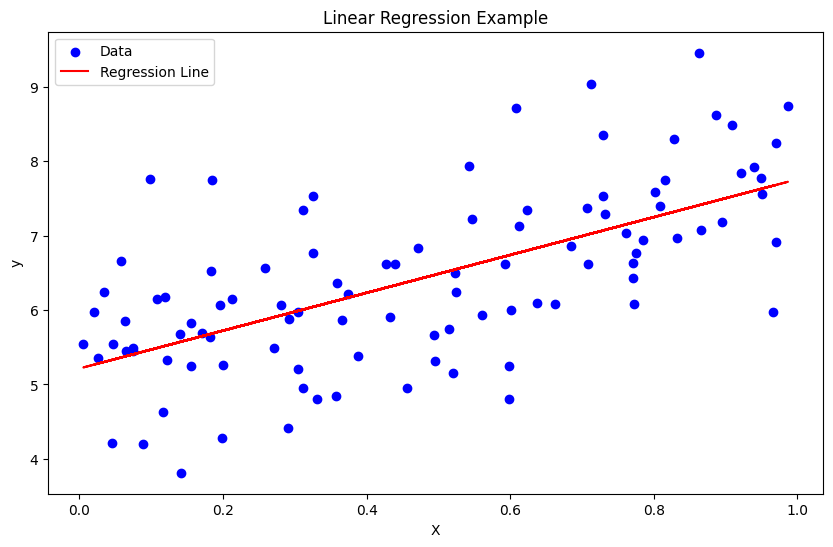

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate synthetic data for regression
np.random.seed(42)
X = np.random.rand(100, 1)  # Independent variable
y = 5 + 3 * X + np.random.randn(100, 1)  # Dependent variable with some noise

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get model parameters
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Linear Regression Equation: y = {intercept:.2f} + {slope:.2f}x")

# Predict the values
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4. Sampling Methods
In Python, we can demonstrate different sampling methods using the numpy, pandas, and random libraries. For simplicity, let's generate a population and apply each sampling method to it.

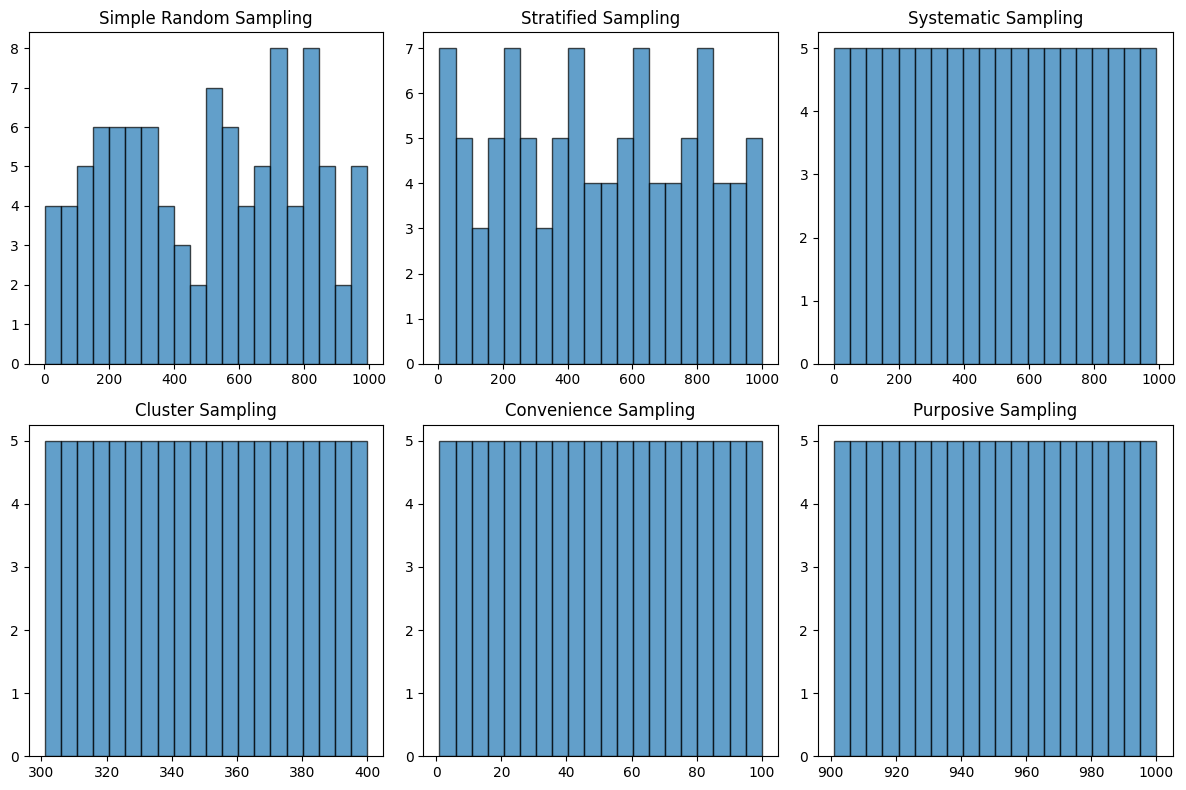

In [26]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Create a population (e.g., 1000 individuals with values)
population = np.arange(1, 1001)  # Population of 1000 individuals
population_size = len(population)

# Simple Random Sampling
random_sample = np.random.choice(population, size=100, replace=False)

# Stratified Sampling
# Divide the population into 5 strata (e.g., by value ranges)
strata = pd.cut(population, bins=5, labels=['Stratum 1', 'Stratum 2', 'Stratum 3', 'Stratum 4', 'Stratum 5'])
strata_groups = pd.DataFrame({'Value': population, 'Stratum': strata})

# Now we specify `observed=False` explicitly to avoid the warning
stratified_sample = pd.concat([group.sample(n=20, random_state=1) for _, group in strata_groups.groupby('Stratum', observed=False)])

# Systematic Sampling
k = population_size // 100  # Take every k-th element
systematic_sample = population[::k][:100]

# Cluster Sampling
# Divide the population into clusters of 100 individuals
clusters = np.array_split(population, 10)
random_cluster = random.choice(clusters)  # Select one random cluster
cluster_sample = random_cluster

# Convenience Sampling
# Just take the first 100 individuals (non-random, based on availability)
convenience_sample = population[:100]

# Purposive Sampling
# Let's say we deliberately choose individuals from the highest values (e.g., the top 100)
purposive_sample = population[-100:]

# Quota Sampling
# Divide population into 5 equal subgroups and sample 20 from each
quota_sample = []
for i in range(5):
    quota_sample.extend(population[i*200:(i+1)*200][:20])

# Snowball Sampling
# Start with 5 random people and keep adding the next 5 people they refer
snowball_sample = population[:5].tolist()
for i in range(5, 50, 5):
    snowball_sample.extend(population[i:i+5])

# Visualizing the results for comparison (showing just a few samples)
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(random_sample, bins=20, edgecolor='k', alpha=0.7)
plt.title('Simple Random Sampling')

plt.subplot(2, 3, 2)
plt.hist(stratified_sample['Value'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Stratified Sampling')

plt.subplot(2, 3, 3)
plt.hist(systematic_sample, bins=20, edgecolor='k', alpha=0.7)
plt.title('Systematic Sampling')

plt.subplot(2, 3, 4)
plt.hist(cluster_sample, bins=20, edgecolor='k', alpha=0.7)
plt.title('Cluster Sampling')

plt.subplot(2, 3, 5)
plt.hist(convenience_sample, bins=20, edgecolor='k', alpha=0.7)
plt.title('Convenience Sampling')

plt.subplot(2, 3, 6)
plt.hist(purposive_sample, bins=20, edgecolor='k', alpha=0.7)
plt.title('Purposive Sampling')

plt.tight_layout()
plt.show()
